<a href="https://colab.research.google.com/github/RaulLozanoPonce/PCPeripheral/blob/master/PC_Peripheral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PC-PERIPHERAL**

Se trata de una red convolutiva que distingue y clasifica 10 tipos diferentes de periféricos. Los 10 tipos a distinguir son:

1.   Altavoces
2.   Auriculares
3.   Impresora
4.   Mando
5.   Micrófono
6.   Pantalla
7.   Ratón
8.   Teclado
9.   Torre
10.   Web Cam

Cabe destacar que el dataset no ha sido descargado de ninguna página; ha sido creado por mi foto a foto. Es por ello que tan solo se disponen de unas 100 muestras aproximadamente por cada periférico.

La mayoría de las fotos se han obtenido del buscador de imágenes de Google. Esta es la razón por la cual la mayoría de las fotos muestran un característico fondo banco, ya que la mayoría son procedentes de páginas de compra online de periféricos. No obstante, se ha priorizado incluir fotos más cotidianas, e incluso algunas fueron obtenidas de primera mano, o bien gracias a terceros.

El dataset se encuentra disponible en una carpeta de mi drive personal, a la cual hago referencia a continuación:
https://drive.google.com/drive/folders/1rp_-tf4BIayfe7KG0gmKBrxtA-4AWtOK?usp=sharing

En el último apartado del programa, se prueba la funcionalidad de la red con fotos que se encuentran en la siguiente carpeta: https://drive.google.com/drive/folders/1EZF4RwbkOhVgF10T1-KWiFZEQwXFqfjd?usp=sharing

In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


### Comprobación del correcto funcionamiento del DataSet

Altavoces    Impresora	Micro	  Pantalla  Teclado  WebCam
Auriculares  Mando	omar.jpg  Raton     Torre


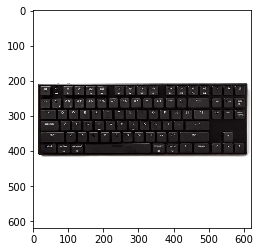

In [0]:
!ls "/content/drive/My Drive/PCDataset"

from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

%matplotlib inline
pil_im = Image.open('/content/drive/My Drive/PCDataset/Teclado/tec4.jpg', 'r')
imshow(np.asarray(pil_im))

In [0]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

### Código de la red convolutiva

In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import keras
from time import time


# DATA SOURCE --------------------------------------------------

batch_size = 20

train_data_dir = '/content/drive/My Drive/PCDataset'
validation_data_dir = '/content/drive/My Drive/PCDataset'

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

# MODEL --------------------------------------------------

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(150, 150, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

# TRAINING --------------------------------------------------

epochs = 40

history = model.fit_generator(
        train_generator,
        steps_per_epoch=52,
        epochs=epochs, 
        validation_data=validation_generator,
        validation_steps=20,
)

Found 1023 images belonging to 10 classes.
Found 1023 images belonging to 10 classes.
Epoch 1/40
52/52 [==============================] - 19s 360ms/step - loss: 2.3045 - acc: 0.1173 - val_loss: 2.9198 - val_acc: 0.0969
Epoch 2/40
52/52 [==============================] - 18s 338ms/step - loss: 2.2649 - acc: 0.1645 - val_loss: 2.0960 - val_acc: 0.2895
Epoch 3/40
52/52 [==============================] - 16s 306ms/step - loss: 2.0773 - acc: 0.2650 - val_loss: 2.2531 - val_acc: 0.2172
Epoch 4/40
52/52 [==============================] - 16s 311ms/step - loss: 1.9721 - acc: 0.3089 - val_loss: 2.0901 - val_acc: 0.2066
Epoch 5/40
52/52 [==============================] - 17s 323ms/step - loss: 1.8048 - acc: 0.3791 - val_loss: 1.4767 - val_acc: 0.4757
Epoch 6/40
52/52 [==============================] - 16s 305ms/step - loss: 1.6591 - acc: 0.4127 - val_loss: 1.3571 - val_acc: 0.5641
Epoch 7/40
52/52 [==============================] - 15s 297ms/step - loss: 1.4694 - acc: 0.4732 - val_loss: 1.4296 -

### Gráficas de de precisión y pérdidas

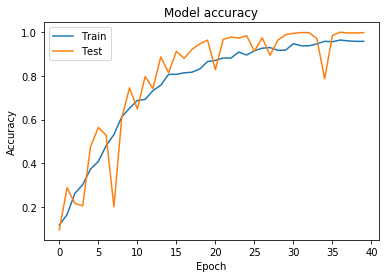

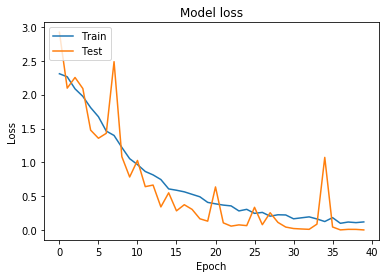

In [0]:
import matplotlib.pyplot as plt

model.save('/content/drive/My Drive/Colab Notebooks/pcperipheral.h5')

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### Validación manual

In [0]:
def imageResult(vec, label):
  for i in range (0, len(vec)):
    if vec[i] > 0.5:
      j = 0
      for key in label:
        if i == j:
          print("La imagen a validar se trata de: ", key)
        j += 1

altPrueba.jpg  keyPrueba.jpg  panPrueba.jpg
La imagen a validar se trata de:  Altavoces
La imagen a validar se trata de:  Teclado


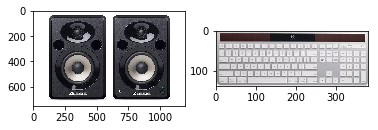

In [0]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

!ls "/content/drive/My Drive/PruebaPCDataset"

%matplotlib inline

plt.subplot(1,2,1)
img_path = '/content/drive/My Drive/PruebaPCDataset/altPrueba.jpg'
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
x = x/255.

features = model.predict(x)
label_map = (train_generator.class_indices)
imageResult(features[0], label_map)

pil_im = Image.open(img_path, 'r')
imshow(np.asarray(pil_im))

plt.subplot(1,2,2)
img_path = '/content/drive/My Drive/PruebaPCDataset/keyPrueba.jpg'
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
x = x/255.

features = model.predict(x)
label_map = (train_generator.class_indices)
imageResult(features[0], label_map)

pil_im = Image.open(img_path, 'r')
imshow(np.asarray(pil_im))